## Chapter 14
# Trees and Forests

The basis of tree-based learners is the decision tree wherein a series of decision rules are chained. 
* https://www.stat.berkeley.edu/~breiman/RandomForests/

## 14.1 Training a Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
targets = iris.target

decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(features, targets)

observation = [[5, 4, 3, 2]]
print("the prediction for {} is {}".format(observation, model.predict(observation)))
print("predicted probabilities for the three classes: {}".format(model.predict(observation)))

the prediction for [[5, 4, 3, 2]] is [1]
predicted probabilities for the three classes: [1]


### Discussion
Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default `DecisionTreeClassifier` uses Gini impurity:
$$
G(t) = 1 - \sum_{i=1}^c{p_i^2}
$$
where G(t) is the Gini impurity at node t and $p_i$ is the proportion of observations of class c at node t.

This process of finding the decision rules that create splits to increase impurity is repeated recursively untill all leaf nodes are pure (i.e. contain only one class) or some abritary cut-off is reached

We can change the `criterion` parameter to use a different impurity measurement

In [9]:
# create decision tree classifier using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = decisiontree_entropy.fit(features, targets)

### See Also
* Decision Tree Learning, Princeton (https://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/mitchell-dectrees.pdf)

## Training a Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

decisiontree = DecisionTreeRegressor(random_state=0)
model = decisiontree.fit(features, target)

observation = [[0.02, 16]]
model.predict(observation)

array([33.])

### Discussion
Decision tree regression works similarly to decision tree classification, however instead of reducing Gini impurity or entropy, potential splits are by default measure on how much they reduce mean squared error (MSE):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat y_i)^2}
$$

where $y_i$ is the true value of the target and $\hat y_i$ is the predicted value.

We can use the `criterion` parameter to select the desired measurement of split quality. For example we can construct a tree whose splits reduce mean absolute error:

In [13]:
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(features, target)

### See Also
* Decision Tree Regression, scikit-learn (http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)
* http://saedsayad.com/decision_tree_reg.htm

## 14.3 Visualizing a Decision Tree Model

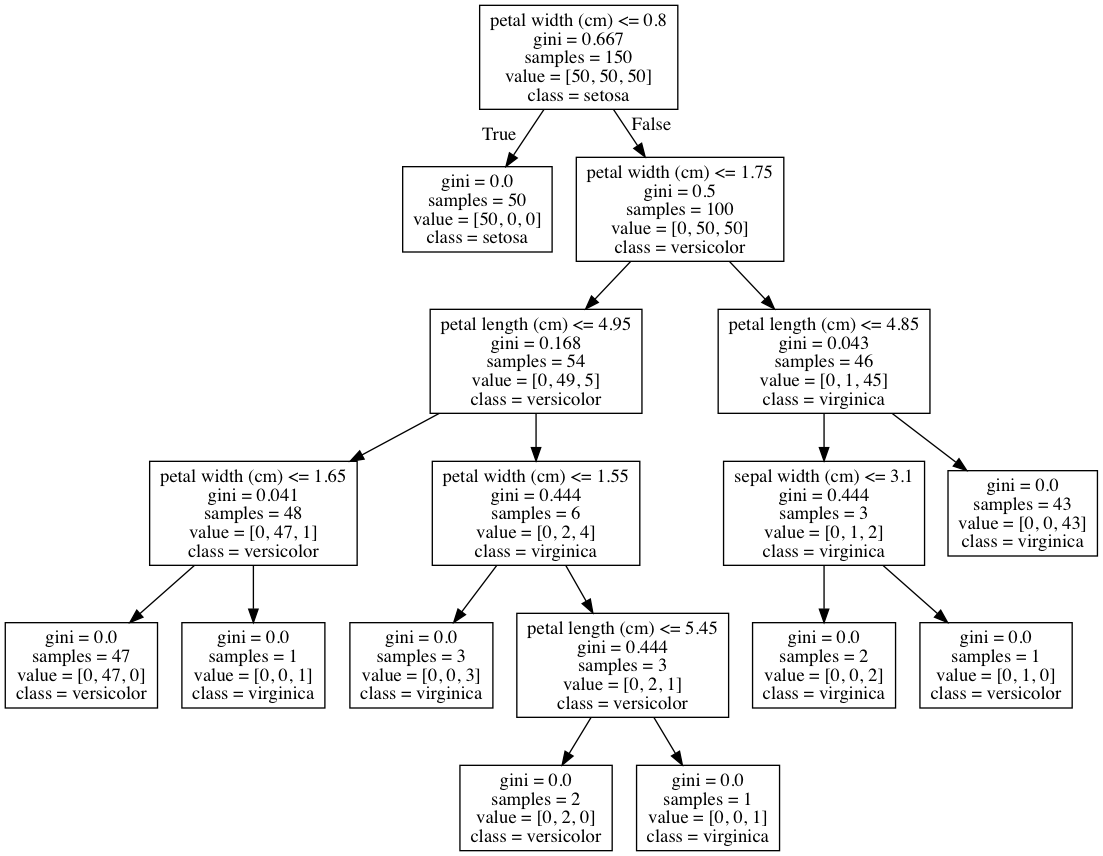

In [3]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0)

model = decisiontree.fit(features, target)

dot_data = tree.export_graphviz(decisiontree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# create pdf
#graph.write_pdf("iris.pdf")

# create png
#graph.write_png("iris.png)

## 14.4 Training a Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0)
model = randomforest.fit(features, target)

#randomforest_entropy = RandomForestClassifier(criterion='entropy', random_state=0)
#model_entropy = randomforest_entropy.fit(features, target)

observation = [[ 5, 4, 3, 2]]
model.predict(observation)

array([1])

#### Discussion
A common problem with decision trees is that they tend to fit the training data too closely (i.e. overfitting). This has motivated the widespread use of an ensemble learning method called *random forest*. In a random forest, many decision trees are trained, but each tree only recieves a bootstrapped sample of observations (i.e. a random sample of observations with replacement that matches the original number of observations) and each node only considers a subset of features when determining the best split. The forest of randomized decision trees votes to determin the predicted class

## 14.5 Training a Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
model = randomforest.fit(features, target)

## 14.6 Identifying Important Features in Random Forests

model.feature_importances_: [0.11896532 0.0231668  0.36804744 0.48982043]


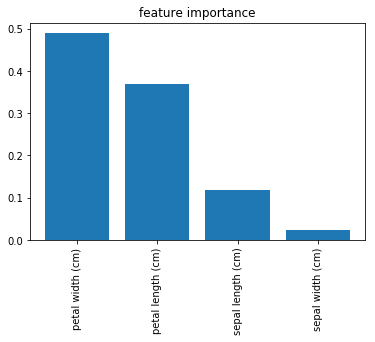

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0)
model = randomforest.fit(features, target)

importances = model.feature_importances_
print("model.feature_importances_: {}".format(importances))
indices = np.argsort(importances)[::-1]
names = [iris.feature_names[i] for i in indices]
plt.figure()
plt.title("feature importance")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

## 14.7 Selecting Important Features in Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel


iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# create object that selects features with importance greater
# than or requal to a threshold
selector = SelectFromModel(randomforest, threshold=0.9)

features_important = selector.fit_transform(features, target)

model = randomforest.fit(features_important, target)

### See Also
* https://hal.archives-ouvertes.fr/file/index/docid/755489/filename/PRLv4.pdf

## 14.8 Handling Imbalanced Classes

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()
features = iris.data
target = iris.target

features = features[40:, :]
target = target[40:]

target = np.where((target == 0), 0, 1)

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
model = randomforest.fit(features, target)

### Discussion
A useful argument is `balanced`, wherein classes are automatically weighted inversely proptional to how frequently they appear in the data:
$$
w_j = \frac{n}{kn_j}
$$
where $w_j$ is the weight to class j, n is the number of observations, $n_j$ is the number of observations in class j, and k is the total number of classes.

## 14.9 Controlling Tree Size

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0)

model = decisiontree.fit(features, target)

## 14.10 Improving Performance Through Boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

adaboost = AdaBoostClassifier(random_state=0)

model = adaboost.fit(features, target)

### Discussion
In random forest, an ensemble (group) of randomized decision trees predicts the target vector. An alternative, and often more powerful, approach is called *boosting*. In one form of boosting called AdaBoost, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stupm), each iteration giving higher priority to observations the previous model predicted incorrectly. More specifically in AdaBoost:

1. Assign every observation, $x_p$ an initial weight value, $w_i = \frac{1}{n}$, where n is the total number of observations in the dat

2. Train a "weak" model on the data

3. For each observation:
    a. If weak model predicts $x_i$ correctly $w_i$ is increased.
    b. If weak model predicts $x_i$ incorrectly $w_i$ is decreased.
    
4. Train a new weak model where observations with greater $w_i$ are given greater priority.

5. Repeat steps 4 and 5 until the data is perfectly predicted or a preset number of weak models has been trained

The end result is an aggregated model where individual weak mdoels focus on more difficult (from a prediction perspective) observations.

## 14.11 Evaluating Random Forests with Out-of-Bag Errors

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(
    random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

model = randomforest.fit(features, target)

randomforest.oob_score_

0.9533333333333334

### Discussion

In random forests, each decision tree is trained using a boostrapped subset of observations. This means that for every tree there is a separate subset of observations not being used to train that tree. These are called out-of-bag (OOB) observations. We can use OOB observations as a test set to evaluate the performance of our random forest.

For every observation, the learning algorithm compares the observation's true vlaue with the prediction from a subset of trees not trained using that observation. The overall score is calculated and provides a single measure of a random forest's performance. OOB score estimation is an alternative to cross-validation